# Fouriertransformation

$$\mathcal{F}_f(\varphi) := \int_{-\infty}^{+\infty}f(x) \cdot e^{-\mathrm{i}\tau x \varphi} dx$$
$$\mathcal{F}^{-1}_f(\varphi) := \int_{-\infty}^{+\infty}\mathcal{F}_f(\varphi) \cdot e^{\mathrm{i}\tau x \varphi} dx$$

### Diskrete Fouiertransformation

$$ c_n = \frac{1}{\sqrt{N}}\sum_{k = 0}^{N-1} f_k \cdot e^{-\mathrm{i} \tau  \frac{n k}{N}} $$ 
$$ f_k = \frac{1}{\sqrt{N}}\sum_{n = 0}^{N-1} c_n \cdot e^{\mathrm{i} \tau  \frac{n k}{N}} $$ 

In [1]:
from Vector import Vector
from Complex import Complex


def read(file_name):
    with open(file_name, 'r') as file:
        data = {int((t := line.replace('\n', '').split('\t'))[0]): Complex(float(t[1]), float(t[2])) for line in file.readlines()}
    return data


def write(file_name, data, epsilon=0):
    with open(file_name, 'w') as file:
        for i, c in data.items():
            if abs(c) > epsilon:
                file.write(f"{i}\t{c.real}\t{c.imag}\n")
            else:
                file.write(f"{i}\t0\t0\n")


write('daten_copy.txt', read('daten_original.txt'))
print(read('daten_copy.txt') == read('daten_original.txt'))

True


In [2]:
from math import sqrt
from math import tau


def fourier(data, inverse=False):
    N = len(data)
    return {n: 1/sqrt(N) * sum(v * Complex((-1 if inverse else 1)*tau*n*k/N) for k, v in data.items()) for n in range(N)}
    

D = read('daten_original.txt')
T = fourier(D)


write('daten__transformed_0.txt', T, 0)
write('daten__transformed_0,1.txt', T, 0.1)
write('daten__transformed_1,0.txt', T, 1.0)


DF0 = read('daten__transformed_0.txt')
DF1 = read('daten__transformed_0,1.txt')
DF2 = read('daten__transformed_1,0.txt')


DR0 = fourier(DF0, True)
DR1 = fourier(DF1, True)
DR2 = fourier(DF2, True)

In [3]:
print(f"""
Maximale Abweichungen für:
Epsilon = 0.0:\t{max(abs(v-D[i]) for i, v in DR0.items())}
Epsilon = 0.1:\t{max(abs(v-D[i]) for i, v in DR1.items())}
Epsilon = 1.0:\t{max(abs(v-D[i]) for i, v in DR2.items())}
""")


Maximale Abweichungen für:
Epsilon = 0.0:	1.0979797394519057e-11
Epsilon = 0.1:	0.503172034576405
Epsilon = 1.0:	1.2623716348814735



## Urdaten

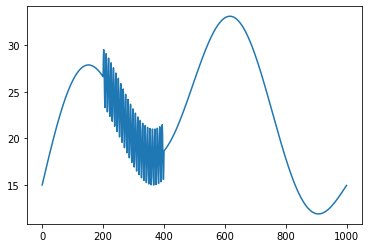

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline


plt.plot(list(D.keys()), list(z.real for z in D.values()))
plt.show()

## Fouriertransformation

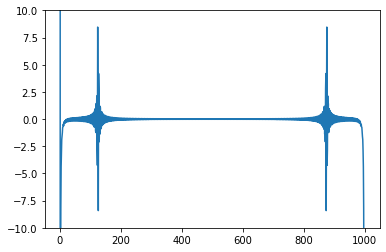

In [6]:
plt.plot(list(T.keys()), list(z.real for z in T.values()))
plt.ylim(-10, 10)
plt.show()

## Rücktransformation
### Epsilon = 0.0

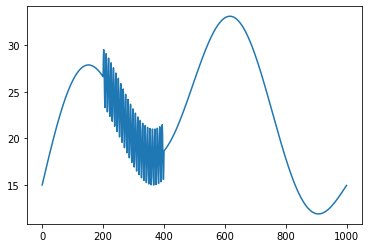

In [7]:
plt.plot(list(DR0.keys()), list(z.real for z in DR0.values()))
plt.show()

### Epsilon = 0.1

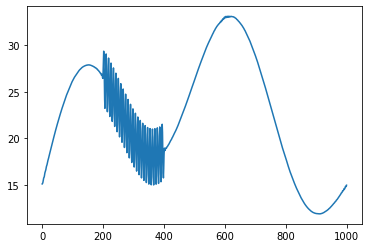

In [8]:
plt.plot(list(DR1.keys()), list(z.real for z in DR1.values()))
plt.show()

### Epsilon = 1.0

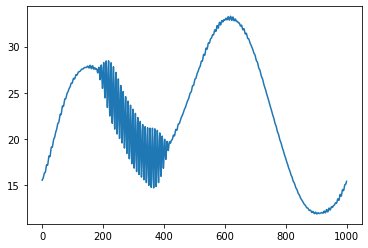

In [9]:
plt.plot(list(DR2.keys()), list(z.real for z in DR2.values()))
plt.show()